In [ ]:
from notion2pandas import Notion2PandasClient
import sys
sys.path.append('../../')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import constants 

n2p = Notion2PandasClient(auth=constants.NOTION_TOKEN)
notion_df = n2p.from_notion_DB_to_dataframe(constants.NOTION_DB_ID)


pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
cloud_folder = pth_base + 'My Drive/Projects/Materials/'
img_pth = cloud_folder+'Outputs/Resonators/Summary/'

# Used for plotting from Notions

# Main quadruple plot

IndexError: list index out of range

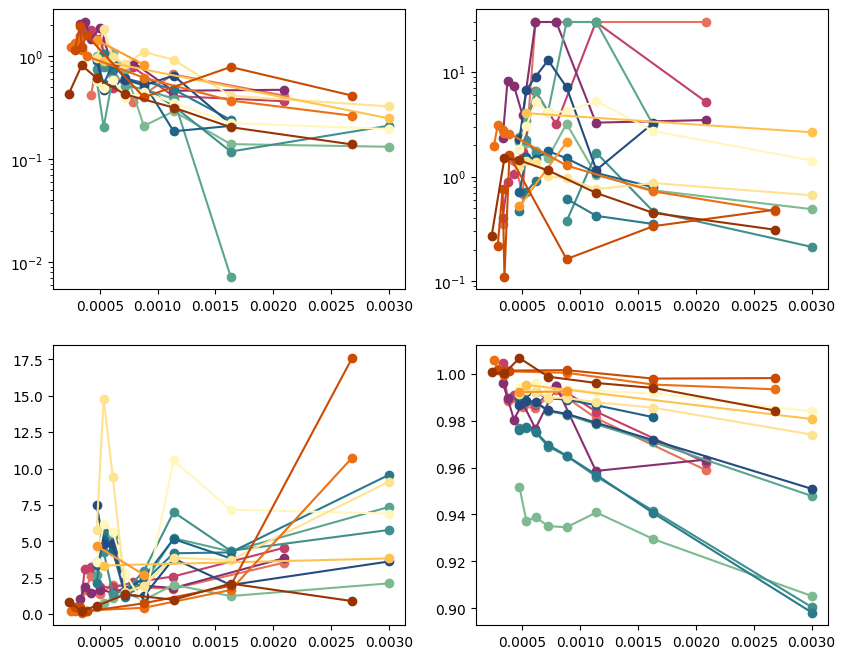

In [28]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 7
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            col = b2[j]
            j+=1
    else:
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col)
    ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)
    ax[2].plot(group[xval], group['Qc (1e6)'], 'o-', label=name, color=col)
    ax[3].plot(group[xval], group['Freq (GHz)']/group['Target Freq. (GHz)'], 'o-', label=name, color=col)
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax[0].legend(ncol=2, fontsize=8)
ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')
ax[3].set_ylabel('Freq. Ratio')

for a in ax: 
    a.set_xlabel(xval)
    if xval == 'P_ms':
        a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(img_pth + f"resonators_{current_time}.png")

# Triple plot

Number of unique names in num_silicon_nb: 6
Number of samples with Substrate Silicon and Metal Nb: 47


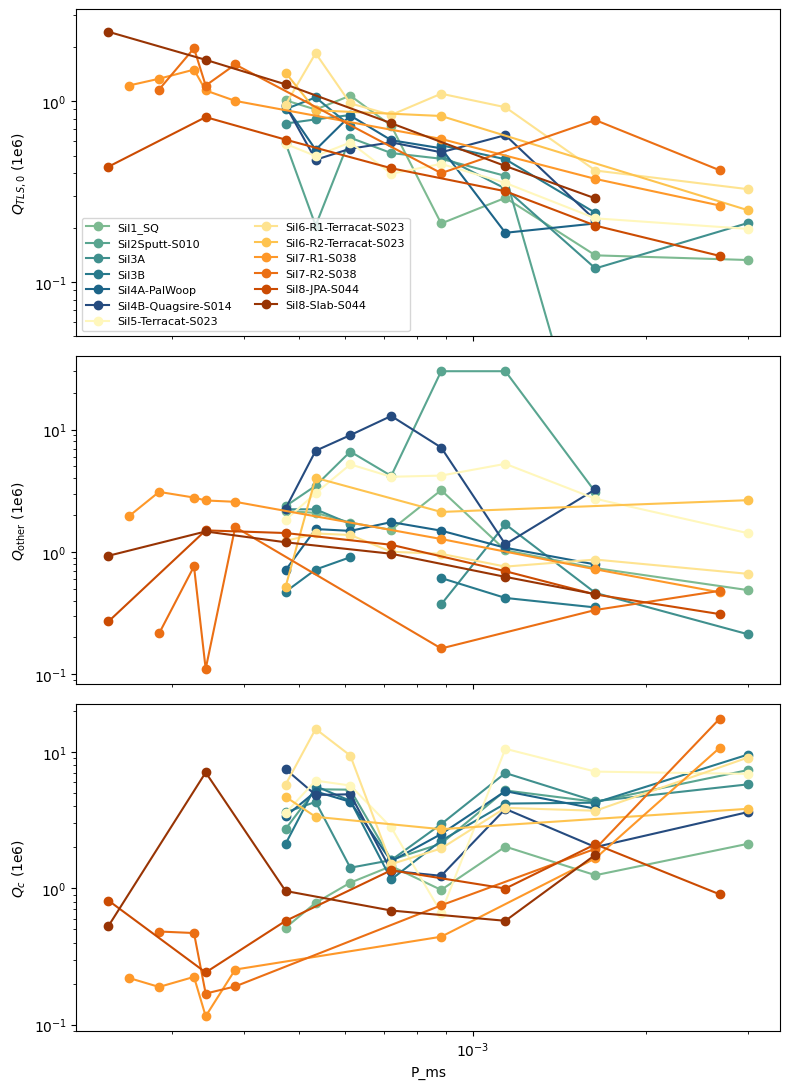

In [31]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(3,1, figsize=(8,11), sharex=True)

xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 7

num_sapphire = (notion_df['Substrate'] == "Sapphire").sum()
b1 = sns.color_palette('flare',num_sapp)

num_silicon_nb = (notion_df['Substrate'] == "Silicon") & (notion_df['Metal'] == "Nb")
unique_names_in_num_silicon_nb = notion_df[num_silicon_nb]['Name'].nunique()
print(f"Number of unique names in num_silicon_nb: {unique_names_in_num_silicon_nb}")
num_silicon_nb_samples = num_silicon_nb.sum()
print(f"Number of samples with Substrate Silicon and Metal Nb: {num_silicon_nb_samples}")

num_silicon_ta = (notion_df['Substrate'] == "Silicon") & (notion_df['Metal'] == "Ta")
unique_names_in_num_silicon_ta = notion_df[num_silicon_ta]['Name'].nunique()
num_silicon_ta_samples = num_silicon_ta.sum()

b2 = sns.color_palette('crest',unique_names_in_num_silicon_nb )

b3 = sns.color_palette('YlOrBr',unique_names_in_num_silicon_ta)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            
            col = b2[j]
            j+=1
    else:
        continue
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col)
    ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)
    ax[2].semilogy(group[xval], group['Qc (1e6)'], 'o-', label=name, color=col)
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax[0].legend(ncol=2, fontsize=8)
ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')

ax[2].set_xlabel(xval)
for a in ax: 
    #a.set_xlabel(xval)
    if xval == 'P_ms':
        a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

# Just qother

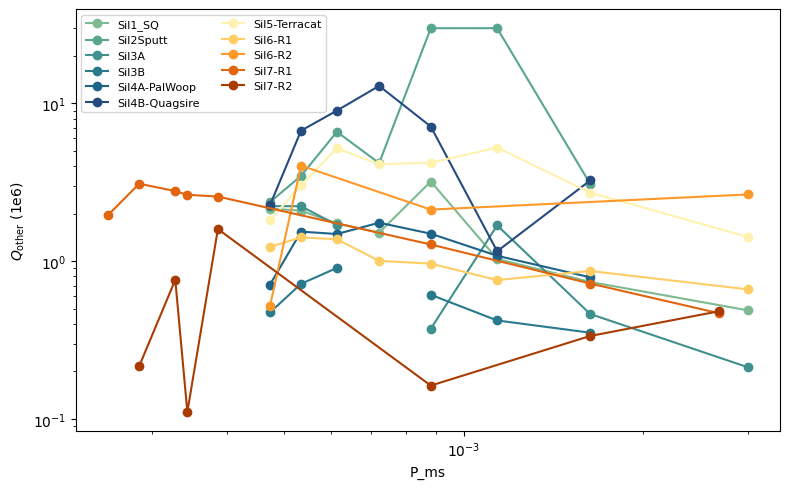

In [10]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(1,1, figsize=(8,5))
xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 5
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            col = b2[j]
            j+=1
    else:
        continue
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax.semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)

    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax .legend(ncol=2, fontsize=8)
 
ax.set_ylabel('$Q_{\mathrm{other}}$ (1e6)')


ax.set_xlabel(xval)
if xval == 'P_ms':
    ax.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

In [ ]:
gap = [2,4,6,8,10,12,14,16]
qc_val = [3.447,
	2.683,
	2.838,
	2.027,
	2.044,
	2.383,
	2.219,
	0.2815]
#ax[2].plot(gap, qc_val, 'o-', label='Qc (1e6) from fit', color='black')

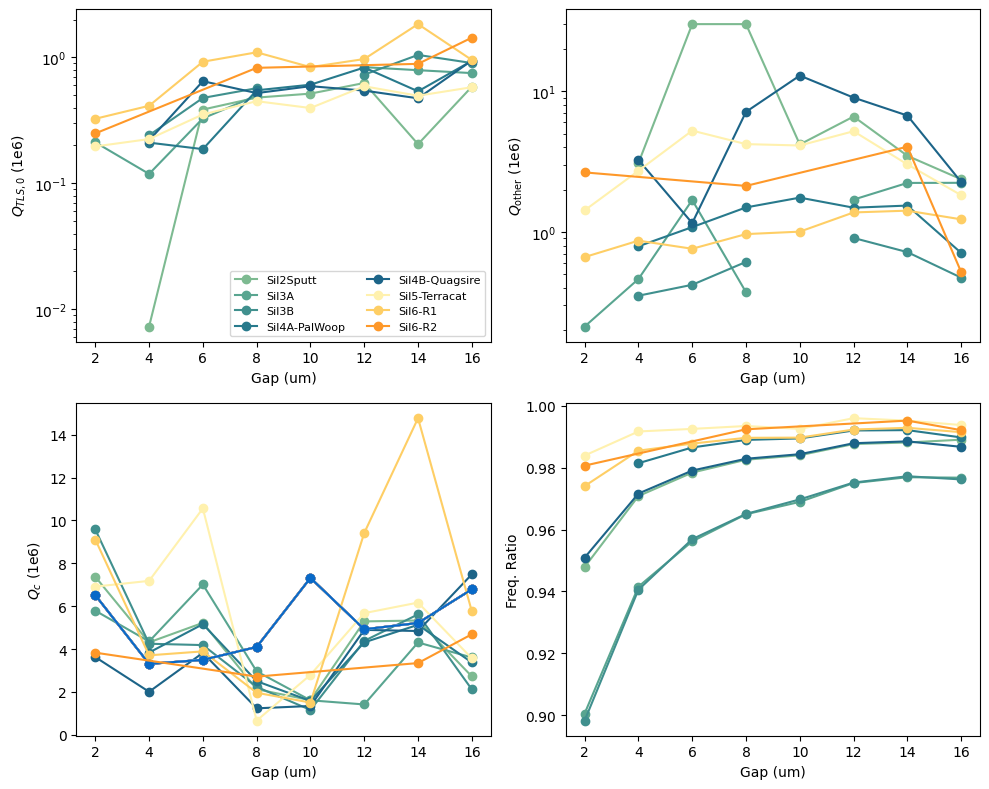

In [543]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))
import numpy as np
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
#xval = 'P_ms'
xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 5
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil)
col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Pattern'].iloc[0]=='Houck_Sil': #'QcAdj_Sil':
        if group['Substrate'].iloc[0]=='Silicon':
            if group['Metal'].iloc[0]=='Ta':
                col=b3[k]
                k+=1
            else:
                col = b2[j]
                j+=1
        else:
            continue
            # col = b1[i]
            # i+=1
        group = group.sort_values(by=xval)
    

        try:
            #ax[2].plot(group[xval], qc, 'o-', label='Qc (1e6) from fit', color='black')
            #ax[2].plot(group[xval], 2e2*gap**2/group['Freq (GHz)']**2/group['Pin (um)']**3.5, 'o-', label='Qc (1e6) from fit', color='gray')
            #ax[2].plot(group[xval], gap**2.5/group['Freq (GHz)']**2/group['Pin (um)']**2.5, 'o-', label='Qc (1e6) from fit', color='gray')
            ax[2].plot(pin/1.77*1e6, 0.085*qc_func(eps_sil, 14.18e-6, gap, pin, 50, freq)/1e6, 'o-') 

        except:
            pass
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
        ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col)
        ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)
        ax[2].plot(group[xval], group['Qc (1e6)'], 'o-', label=name, color=col)
        ax[3].plot(group[xval], group['Freq (GHz)']/group['Target Freq. (GHz)'], 'o-', label=name, color=col)
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax[0].legend(ncol=2, fontsize=8)
#ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')
ax[3].set_ylabel('Freq. Ratio')

for a in ax: 
    a.set_xlabel(xval)
    #a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

# Compare variation 

In [ ]:
mean_qc = notion_df['Qc (1e6)'].mean()
std_qc = notion_df['Qc (1e6)'].std()

mean_qc, std_qc

filtered_df = notion_df[notion_df['Pattern'].isin(['Houck_Sapp', 'Houck_Sil'])]
filtered_df.head()

mean_qc_per_gap_by_substrate = filtered_df.groupby(['Substrate', 'Gap (um)','Metal'])['Qc (1e6)'].mean()
print(mean_qc_per_gap_by_substrate)

std_qc_per_gap_by_substrate = filtered_df.groupby(['Substrate', 'Gap (um)', 'Metal'])['Qc (1e6)'].std()
print(std_qc_per_gap_by_substrate)

Substrate  Gap (um)  Metal
Sapphire   2         Nb       3.977700
           4         Nb       2.046500
           6         Nb       2.024067
           8         Nb       1.777467
           10        Nb       1.657967
           12        Nb       2.436367
           14        Nb       2.198800
           16        Nb       0.535200
Silicon    2         Nb       5.698320
                     Ta       6.618700
           4         Nb       3.334600
                     Ta       5.444450
           6         Nb       4.571483
                     Ta       7.227200
           8         Nb       2.005600
                     Ta       1.779667
           10        Nb       1.461467
                     Ta       2.150950
           12        Nb       3.565850
                     Ta       7.545450
           14        Nb       4.335417
                     Ta       8.094567
           16        Nb       3.304117
                     Ta       4.672800
Name: Qc (1e6), dtype: float64
Substr

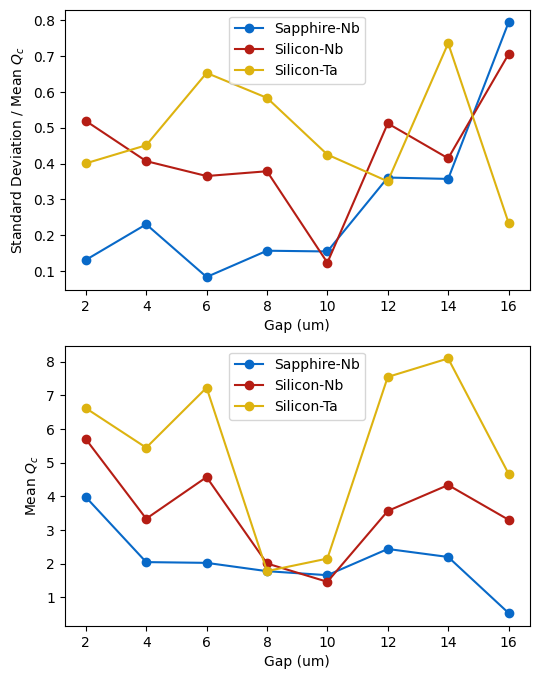

In [530]:
std_df= std_qc_per_gap_by_substrate/mean_qc_per_gap_by_substrate
fig, ax = plt.subplots(2,1, figsize=(6,8))
for (substrate, material), data in std_df.groupby(level=[0, 2]):
    ax[0].plot(data.index.get_level_values('Gap (um)'), data.values, 'o-',label=f"{substrate}-{material}")
ax[0].set_xlabel('Gap (um)')
ax[0].set_ylabel('Standard Deviation / Mean $Q_c$')
ax[0].legend()


#std_df= std_qc_per_gap_by_substrate/mean_qc_per_gap_by_substrate

for (substrate, material), data in mean_qc_per_gap_by_substrate.groupby(level=[0, 2]):
    ax[1].plot(data.index.get_level_values('Gap (um)'), data.values, 'o-',label=f"{substrate}-{material}")
ax[1].set_xlabel('Gap (um)')
ax[1].set_ylabel('Mean $Q_c$')
ax[1].legend()
#plt.grid(True)
plt.savefig(f"resonators_mean_std_{current_time}.png")

# Just QTLS

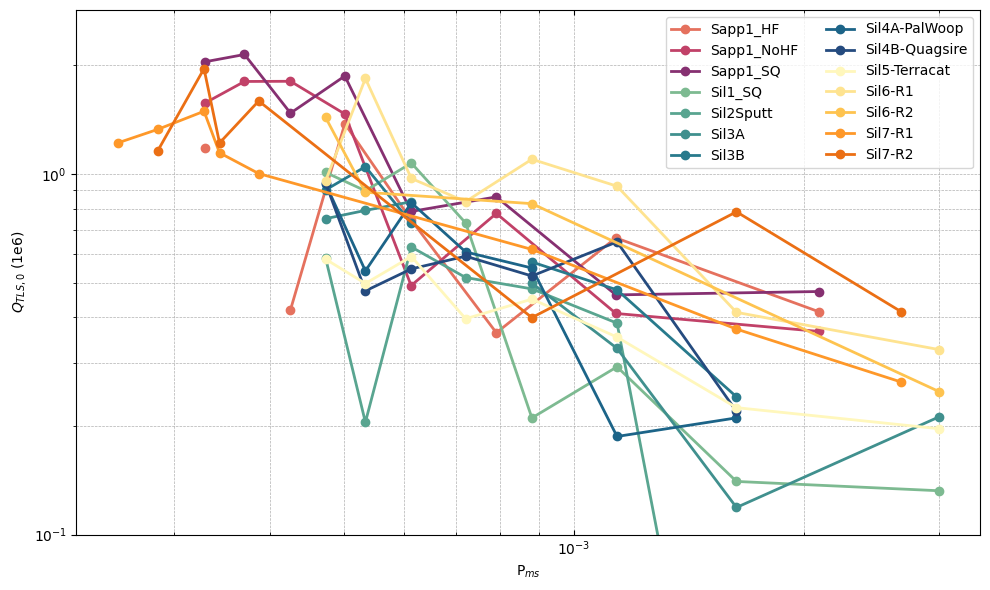

In [4]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(1,1, figsize=(10,6))
xval = 'P_ms'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 4
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil+3)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            col = b2[j]
            j+=1
    else:
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax.loglog(group[xval], group['QTLS0 (1e6)'], 'o-',linewidth=2, label=name, color=col)
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax.legend(ncol=2, fontsize=10)
ax.set_ylim(bottom=0.1)
ax.set_ylabel('$Q_{TLS,0}$ (1e6)')
ax.set_xlabel('P$_{ms}$')
# ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
# ax[2].set_ylabel('$Q_{c}$ (1e6)')
# ax[3].set_ylabel('Freq. Ratio')

# for a in ax: 
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='x', which='both', direction='in', top=True, bottom=True)
#     a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

# Single sample

In [2]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax = ax.flatten()
xval = 'P_ms'
#xval = 'Target Freq. (GHz)'
group = notion_df[notion_df['Name'] == 'Sil7-R2']

group = group.sort_values(by=xval)
#print(group)
#print(f"Group: {name}")
#print(group['Gap (um)'])
ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-')
ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-')
ax[2].semilogy(group[xval], group['Qc (1e6)'], 'o-')
ax[3].plot(group[xval], group['Freq (GHz)']/group['Target Freq. (GHz)'], 'o-')
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax[0].legend(ncol=2, fontsize=8)
ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')
ax[3].set_ylabel('Freq. Ratio')

for a in ax: 
    a.set_xlabel(xval)
    a.set_xscale('log')


qc = [0.184,  0.4734, 0.3847,0.1394, 0.2640, 0.6906, 1.825, 15.88]
#ax[2].plot(group[xval], qc, 'o-', label='Qc (1e6) from fit', color='black')

fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

NameError: name 'sns' is not defined